<div align="center">
    <h1 align="center">Tugas Besar IF2220 Probabilitas dan Statistika 2023/2024</h1>
    <h3>Topik : Health</h3>
    <strong>
        <h4>Dibuat oleh: </h4>
        <h4>K01 - Kelompok 24</h4>
            <table>
              <tr>
                <td>NIM</td>
                <td>Nama</td>
              </tr>
              <tr>
                <td>13522071</td>
                <td>Bagas Sambega Rosyada</td>
              </tr>
              <tr>
                <td>13522091</td>
                <td>Raden Francisco Trianto Bratadiningrat</td>
              </tr>
            </table>
      </strong>
</div>


## Inisialisasi Dependencies Python dan Pembacaan Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import Markdown, display
import math

# Read data from CSV
data = pd.read_csv("health.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2000 non-null   int64  
 1   Income                   2000 non-null   float64
 2   Gender                   2000 non-null   object 
 3   Education                2000 non-null   object 
 4   Stress_Level             2000 non-null   float64
 5   Exercise_Hours_Per_Week  2000 non-null   float64
 6   Cholesterol_Level        2000 non-null   float64
 7   Weight                   2000 non-null   float64
 8   Height                   2000 non-null   float64
 9   Blood_Pressure           2000 non-null   float64
 10  Health_Status            2000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 187.5+ KB


# Soal General

## Nomor 1

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data
yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi,
variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data
dalam bentuk string dapat dicari unique values, dan proporsi nya.

### Jawab: Menulis Deskripsi Statistika dari semua kolom pada data

Kolom-Kolom dibagi menjadi bentuk data numerik dan string:
- String: Gender, Education, Health_Status
- Numerik: Age, Income, Stress_level, Exercise_Hours_Per_Week, Cholesterol_Level, Weight, Height, Blood_Pressure

#### Data String

Untuk data string akan dicari:
- Unique values
- Proporsi

In [5]:
# Get columns with string type
string_columns = data.select_dtypes(include=['object']).columns

# For all colum with type string
for column in string_columns:
    stat = pd.DataFrame()
    
    # Get unique values and their counts
    unique_values = data[column].value_counts()
    
    # Calculate proportions
    proportions = unique_values*100 / len(data)

    # Construct frame
    stat["Unique Value"] = unique_values.index
    stat["Frekuensi"] = unique_values.values
    stat["Proporsi (%)"] = proportions.values
    
    # Print result
    print("Data for " + column)
    print(stat)
    print("\n")

Data for Gender
  Unique Value  Frekuensi  Proporsi (%)
0       Female       1011         50.55
1         Male        989         49.45


Data for Education
        Unique Value  Frekuensi  Proporsi (%)
0  Bachelor's Degree        940         47.00
1    Master's Degree        482         24.10
2        High School        271         13.55
3                PhD        247         12.35
4              Other         57          2.85
5          undefined          3          0.15


Data for Health_Status
  Unique Value  Frekuensi  Proporsi (%)
0         Fair        519         25.95
1         Poor        504         25.20
2    Excellent        503         25.15
3         Good        474         23.70




#### Data Numerik

Untuk data numerik akan dicari:
- mean 
- median
- modus
- standar deviasi
- variansi
- range
- minimum
- maksimum
- kuartil
- IQR
- skewness
- kurtosis

In [6]:
# Get numeric data
numerik_data = data.select_dtypes(include=['number'])

# Calculate the mode for each column
def get_mode(x: pd.DataFrame) -> pd.Series | None:
    try:
        _ = x.mode()[1]
        mode = 'multivalue'
    except KeyError:
        mode = x.mode()[0]
    return mode

# Construct dataframe
numerik_stat = pd.DataFrame()

numerik_stat["Mean"] = numerik_data.mean().round(3)
numerik_stat["Median"] = numerik_data.median().round(3)
numerik_stat["Modus"] = numerik_data.apply(get_mode)
numerik_stat["Deviasi"] = numerik_data.std().round(3)
numerik_stat["Variansi"] = numerik_data.var().round(3)
numerik_stat["Min"] = numerik_data.min().round(3)
numerik_stat["Max"] = numerik_data.max().round(3)
numerik_stat["Range"] = numerik_stat["Max"] - numerik_stat["Min"]
numerik_stat["Q1"] = numerik_data.quantile(0.25).round(3)
numerik_stat["Q2"] = numerik_data.quantile(0.5).round(3)
numerik_stat["Q3"] = numerik_data.quantile(0.75).round(3)
numerik_stat["IQR"] = (numerik_stat["Q3"] - numerik_stat["Q1"]).round(3)
numerik_stat["Skewness"] = numerik_data.skew().round(3)
numerik_stat["Kurtosis"] = numerik_data.kurtosis().round(3)

# Print result
numerik_stat

,Mean,Median,Modus,Deviasi,Variansi,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Age,39.418,39.000,53,11.561,1.336510e+02,20.000,5.900000e+01,3.900000e+01,30.000,39.000,49.250,19.250,-0.005,-1.203
Income,4889928.319,4898900.675,multivalue,2010795.025,4.043297e+12,-1088986.526,1.222749e+07,1.331648e+07,3580713.611,4898900.675,6271595.199,2690881.588,-0.006,-0.032
Stress_Level,5.357,5.352,multivalue,0.917,8.410000e-01,2.528,8.581000e+00,6.053000e+00,4.738,5.352,6.003,1.265,-0.013,-0.130
Exercise_Hours_Per_Week,9.952,9.927,multivalue,4.910,2.410400e+01,-4.499,2.681600e+01,3.131500e+01,6.655,9.927,13.232,6.577,0.061,0.018
Cholesterol_Level,200.223,200.222,multivalue,0.973,9.460000e-01,196.915,2.031620e+02,6.247000e+00,199.582,200.222,200.874,1.292,-0.072,0.006
Weight,70.234,70.392,multivalue,10.174,1.035170e+02,32.582,1.096100e+02,7.702800e+01,63.655,70.392,76.895,13.240,-0.058,0.125
Height,150.731,150.664,multivalue,0.680,4.630000e-01,149.125,1.538700e+02,4.745000e+00,150.240,150.664,151.140,0.900,0.657,0.708
Blood_Pressure,119.682,119.937,0.0,11.201,1.254720e+02,0.000,2.009500e+02,2.009500e+02,113.049,119.937,126.609,13.560,-1.627,18.838


## Nomor 2

Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya?
Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

### Jawab

Outlier adalah data yang memiliki nilai jauh dari kumpulan data-data lainnya yang terjadi misalkan karena kegagalan pengukuran, salah masukan, dll.

Berdasarkan proses untuk mengatasi dan menghapus data outlier, kami menemukan data memiliki outlier. Hal ini dapat terlihat karena jumlah data pada hasil proses penghapusan outlier, jumlah data berkurang. Namun hal tersebut juga menunjukkan bahwa kami dapat menangani data-data outlier dengan melakukan penghapusa data outlier sebelum digunakan untuk analisis yang lebih lanjut.

#### Langkah Mengatasi Outlier
#### 1. Menghilangkan data yang mengandung nilai kosong atau null karena dapat merusak analisis

Data yang kosong atau null, akan menggangu serta merusak analis. data dengan nilai kosong akan dihapus.

#### 2. Menghilangkan data yang tidak masuk akal

Batas-batas yang digunakan:
 
- Age: Non-Negative
- Stress_Level: Non-Negative
- Exercise_Hours_Per_Week: Non-Negative
- Cholesterol_Level: Non-Negative
- Weight: Non-Negative
- Height: Non-Negative
- Blood_Pressure: Non-Negative
- Education: tidak undefined

#### 3. Menggunakan Nilai Z pada Standar Deviasi
 
Nilai z dari suatu data akan menunjukan seberapa jauh suatu data dengan data lainnya. Secara umum digunakan batas nilai z = 3 sebagai batas apakah suatu data terlalu jauh dari kumpulan data. Dengan menghitung nilai z dari semua kolom yang bertipe numerik, serta menghilangkan data yang memiliki salah satu kolomnya dengan nilai z mutlak lebih besar dari 3, maka kami berhasil mengatasi data-data outlier.



In [21]:
# 1. Remove Null Values 
no_null_data = data.dropna()

# 2. Remove non logical data
result_data = no_null_data.copy()
result_data = result_data[result_data['Age'] >= 0]
result_data = result_data[result_data['Weight'] >= 0]
result_data = result_data[result_data['Stress_Level'] >= 0]
result_data = result_data[result_data['Exercise_Hours_Per_Week'] >= 0]
result_data = result_data[result_data['Cholesterol_Level'] >= 0]
result_data = result_data[result_data['Blood_Pressure'] >= 0]
result_data = result_data[result_data['Education'] != 'undefined']

# 3. using z score to remove outliers
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate the z-score for each student's height
for column in numeric_columns:
    z = np.abs(stats.zscore(result_data[column]))
    
    # Identify outliers ass students with a z-score greater than 3
    threshold = 3
    outliers = result_data[z > threshold]

    result_data = result_data.drop(outliers.index)

# Reset data frame index
result_data.reset_index(drop=True, inplace=True)

result_data

,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,50,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,44,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,25,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,41,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,24,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair
...,...,...,...,...,...,...,...,...,...,...,...
1909,22,2.072546e+06,Male,Master's Degree,5.356903,14.428793,200.696341,49.569958,150.114380,113.658773,Fair
1910,25,7.456909e+06,Female,Master's Degree,5.499054,5.349180,198.991264,73.592521,149.828511,107.860829,Excellent
1911,44,5.560391e+06,Male,PhD,7.034253,3.746812,200.576659,44.493272,150.587193,138.210854,Poor
1912,20,3.436759e+06,Male,Bachelor's Degree,5.690408,5.720289,200.206448,85.255918,150.825614,127.516222,Good


## Nomor 3

Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom
berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan
box plot, dan jika string dengan histogram.

In [8]:
data_column_numeric = result_data.select_dtypes(include=['number']).columns
data_column_string = result_data.select_dtypes(exclude=['number']).columns

# Box plot settings
plt.rcParams['boxplot.boxprops.linewidth'] = 2
plt.rcParams['boxplot.whiskerprops.linewidth'] = 2
plt.rcParams['boxplot.capprops.linewidth'] = 2
plt.rcParams['boxplot.medianprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.marker'] = 'o'
plt.rcParams['boxplot.flierprops.markersize'] = 8
plt.rcParams['boxplot.flierprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.markeredgecolor'] = 'mediumorchid'

def distribution_plot_numeric(column_name: str, bar_label: bool = False, bin_count: int = 20) -> None:
    """
    Create a distribution plot for numeric type
    """

    # Create Plot
    fig_hist, ax_hist = plt.subplots(figsize=(8, 4))
    fig_box, ax_box = plt.subplots(figsize=(8, 3))

    # Plot the histogram
    column_data = result_data[column_name] 
    ax_hist.set_title(f"Distribusi data {column_name}", fontsize=16)
    ax_hist.set_xlabel(column_name, fontsize=14)
    ax_hist.set_ylabel("Frekuensi", fontsize=14)
    hist, bins, _ = ax_hist.hist(column_data, bins=bin_count, color='mediumorchid', edgecolor='black', alpha=0.7, rwidth=0.7)
    ax_hist.grid(True, linestyle='--', alpha=0.5)
    ax_hist.tick_params(axis='both', which='major', labelsize=12)
    
    # Add text label to each bar
    if bar_label :
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        for count, (x, y) in enumerate(zip(bin_centers, hist)):
            ax_hist.text(x, y, f'{int(bins[count]):,} - {int(bins[count+1]):,}', ha='center', va='bottom', fontsize=10)

    # Plot the box plot
    ax_box.set_title(f"Distribusi data {column_name}", fontsize=16)
    ax_box.boxplot(column_data, vert=False)
    ax_box.set_xlabel(column_name, fontsize=14)
    ax_box.set_ylabel("Box Plot", fontsize=14)
    ax_box.boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='mediumorchid'))
    ax_box.grid(True, linestyle='--', alpha=0.5)
    ax_box.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.show()

def distribution_plot_string(column_name: str) -> None:
    """
    Create a distribution plot for string type
    """

    # Extract column data
    column_data = result_data[column_name]

    # Count the frequency of each category
    category_counts = column_data.value_counts()

    # Create plot
    plt.figure(figsize=(8, 4))
    plt.bar(category_counts.index, category_counts.values, color='mediumorchid', alpha=0.7)
    plt.title(f"Distribusi data {column_name}", fontsize=16)
    plt.ylabel("Frekuensi", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Show new data without outliers
numerik_stat = pd.DataFrame()
numerik_data = result_data.select_dtypes(include=['number'])
numerik_stat["Mean"] = numerik_data.mean().round(3)
numerik_stat["Median"] = numerik_data.median().round(3)
numerik_stat["Modus"] = numerik_data.apply(get_mode)
numerik_stat["Deviasi"] = numerik_data.std().round(3)
numerik_stat["Variansi"] = numerik_data.var().round(3)
numerik_stat["Min"] = numerik_data.min().round(3)
numerik_stat["Max"] = numerik_data.max().round(3)
numerik_stat["Range"] = numerik_stat["Max"] - numerik_stat["Min"]
numerik_stat["Q1"] = numerik_data.quantile(0.25).round(3)
numerik_stat["Q2"] = numerik_data.quantile(0.5).round(3)
numerik_stat["Q3"] = numerik_data.quantile(0.75).round(3)
numerik_stat["IQR"] = (numerik_stat["Q3"] - numerik_stat["Q1"]).round(3)
numerik_stat["Skewness"] = numerik_data.skew().round(3)
numerik_stat["Kurtosis"] = numerik_data.kurtosis().round(3)

# Print result
numerik_stat

,Mean,Median,Modus,Deviasi,Variansi,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Age,39.339,39.000,20,11.556,1.335390e+02,20.000,5.900000e+01,3.900000e+01,30.000,39.000,49.000,19.000,-0.001,-1.202
Income,4873208.328,4877759.957,multivalue,2002971.726,4.011896e+12,-1088986.526,1.073412e+07,1.182311e+07,3574727.329,4877759.957,6261419.216,2686691.887,-0.036,-0.117
Stress_Level,5.353,5.350,multivalue,0.910,8.280000e-01,2.662,7.928000e+00,5.266000e+00,4.740,5.350,5.999,1.259,-0.036,-0.224
Exercise_Hours_Per_Week,10.179,10.050,multivalue,4.620,2.134600e+01,0.023,2.403300e+01,2.401000e+01,6.928,10.050,13.340,6.412,0.198,-0.282
Cholesterol_Level,200.226,200.224,multivalue,0.966,9.330000e-01,197.366,2.029420e+02,5.576000e+00,199.582,200.224,200.877,1.295,-0.028,-0.134
Weight,70.196,70.317,multivalue,9.973,9.945800e+01,41.274,1.003330e+02,5.905900e+01,63.634,70.317,76.787,13.153,-0.048,-0.133
Height,150.713,150.657,multivalue,0.652,4.250000e-01,149.125,1.527710e+02,3.646000e+00,150.238,150.657,151.130,0.892,0.448,-0.055
Blood_Pressure,119.896,120.007,multivalue,9.865,9.732600e+01,88.579,1.506350e+02,6.205600e+01,113.191,120.007,126.604,13.413,-0.050,-0.079


In [9]:
# Get columns with string type
string_columns = result_data.select_dtypes(include=['object']).columns

# For all colum with type string
for column in string_columns:
    stat = pd.DataFrame()

    # Get unique values and their counts
    unique_values = result_data[column].value_counts()

    # Calculate proportions
    proportions = unique_values*100 / len(result_data)

    # Construct frame
    stat["Unique Value"] = unique_values.index
    stat["Frekuensi"] = unique_values.values
    stat["Proporsi (%)"] = proportions.values

    # Print result
    print("Data for " + column)
    print(stat)
    print("\n")

Data for Gender
  Unique Value  Frekuensi  Proporsi (%)
0       Female        968     50.574713
1         Male        946     49.425287


Data for Education
        Unique Value  Frekuensi  Proporsi (%)
0  Bachelor's Degree        895     46.760711
1    Master's Degree        469     24.503657
2        High School        258     13.479624
3                PhD        240     12.539185
4              Other         52      2.716823


Data for Health_Status
  Unique Value  Frekuensi  Proporsi (%)
0         Fair        498     26.018809
1         Poor        486     25.391850
2    Excellent        481     25.130617
3         Good        449     23.458725




#### Data Age

Kolom Age memiliki data umur berupa bilangan bulat yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Age memiliki range 39, dengan nilai minimum 20 dan maksismum 59.

Hasil histogram, menunjukan distribusi Age yang cukup rata (uniform) dengan frekuensi tertingi berada pada range umur 20-21 dan terkecil pada range umur 39-41.

Hasil box plot, menunjukan adanya negatif skewness(-0.001). Hal ini disebabkan posisi nilai median(39) yang lebih dekat dengan nilai Kuartil 1(30) dibandingkan dengan nilai Kuartil 3(4).

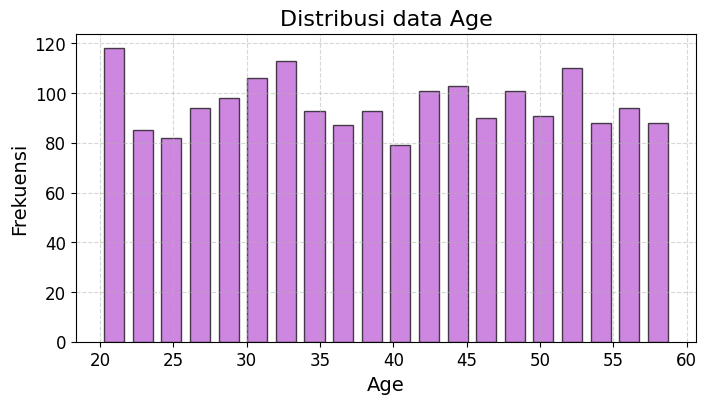

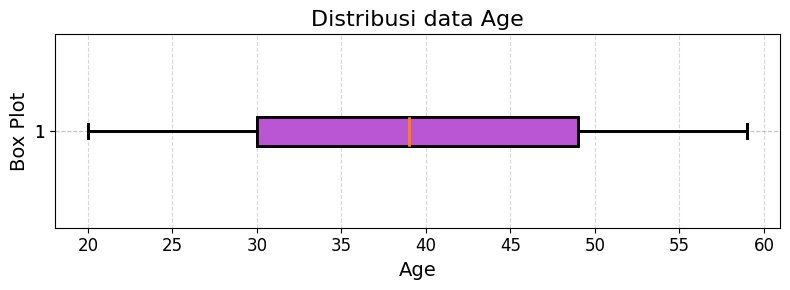

In [10]:
distribution_plot_numeric(data_column_numeric[0])

#### Data Income

Kolom Income memiliki data penghasilan yang berupa bilangan real yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Income memiliki nilai minimum -1.088.987 dan nilai maksismum 12.227.492.

Hasil histogram, menunjukan distribusi Income yang simetris dengan frekuensi tertingi berada pada range penghasilan 4.822.568 - 5.413.723 dan terkecil pada range penghasilan -1.088.986 hingga -497.831.

Hasil box plot, menunjukan adanya negatif skewness (-0.036). Hal ini disebabkan posisi nilai median(4.877.759,957) yang lebih dekat dengan nilai Kuartil 1(3.574.727,329) dibandingkan dengan nilai Kuartil 3(6.261.419,216). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

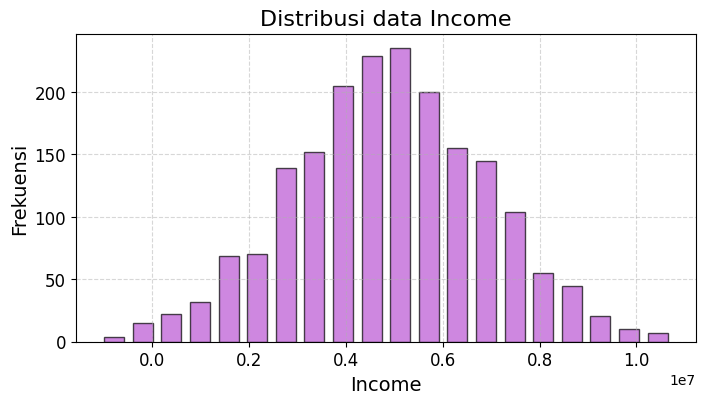

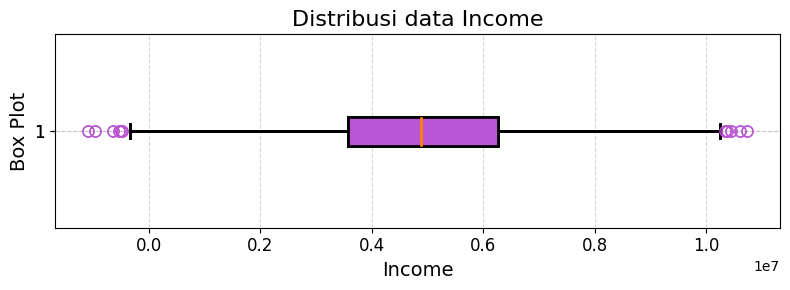

In [11]:
distribution_plot_numeric(data_column_numeric[1])

#### Data Stress_Level

Kolom Stress_Level memiliki data tingkat stress yang berupa bilangan real yang dibagi menjadi 10 bagian dengan lebar yang sama. Kolom Stress_Level memiliki range 5.266 dengan nilai minimum 2.662 dan nilai maksismum 7,928.

Hasil histogram, menunjukan distribusi Stress_Level yang simetris dengan frekuensi tertingi berada pada range 5 - 5(desimal tidak terlihat) dan terkecil pada range 2-3.

Hasil box plot, menunjukan adanya negatif skewness (-0,036). Hal ini disebabkan posisi nilai median(5,350) yang lebih dekat dengan nilai Kuartil 1(4,740) dibandingkan dengan nilai Kuartil 3(5,999). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

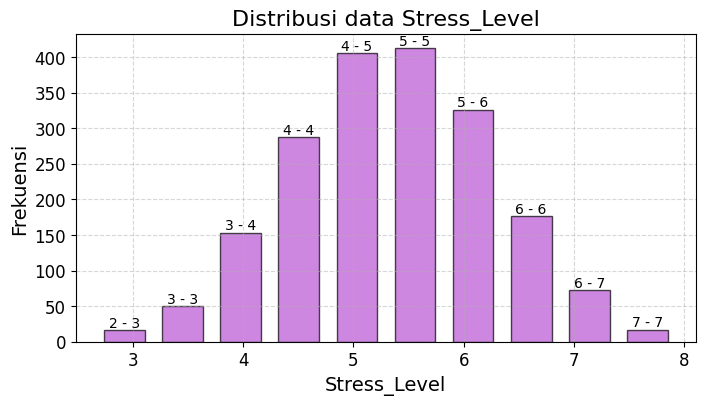

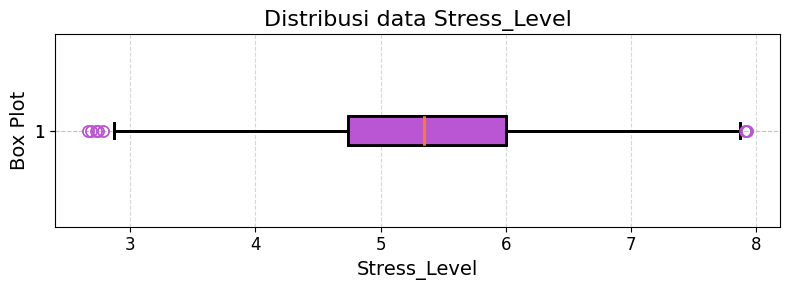

In [12]:
distribution_plot_numeric(data_column_numeric[2], True, bin_count=10)

#### Data Exercise_Hours_Per_Week

Kolom Exercise_Hours_Per_Week merupakan data jumlah waktu olahraga dalam jam per minggu yang berupa bilangan real yang dibagi menjadi 24 bagian dengan lebar yang sama. Kolom Exercise_Hours_Per_Week memiliki range 5,266 dengan nilai minimum 0,023 dan nilai maksismum 24,033.

Hasil histogram, menunjukan distribusi Exercise_Hours_Per_Week yang mengalami skewnes dengan frekuensi tertingi berada pada range 9-10 jam per minggu dan terkecil pada range 22-23 jam per minggu.

Hasil box plot, menunjukan adanya positif skewness (0,198). Hal ini disebabkan posisi nilai median(10,050) yang lebih dekat dengan nilai Kuartil 3(13,340) dibandingkan dengan nilai Kuartil 1(6,928). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga yaitu data yang lebih besar dari kuartil ketiga.

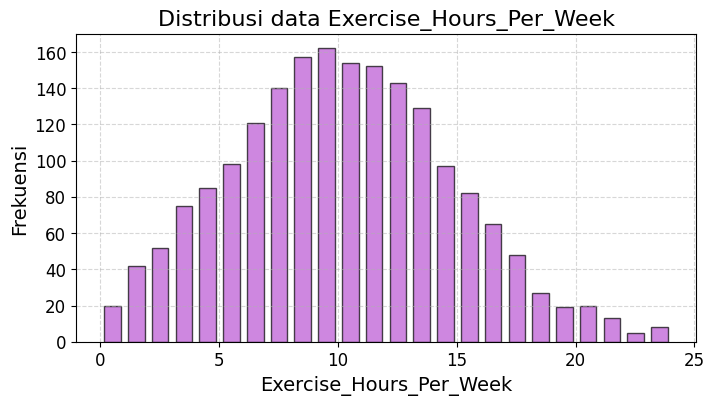

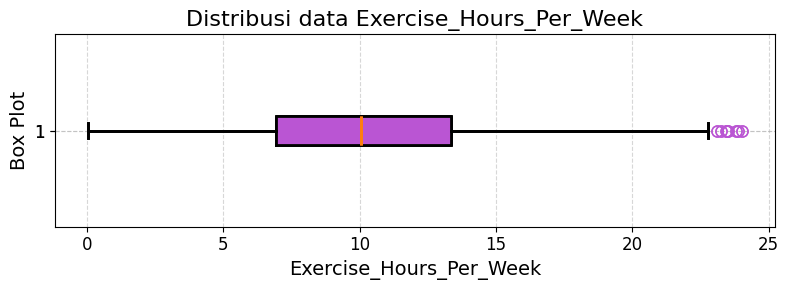

In [13]:
distribution_plot_numeric(data_column_numeric[3], bin_count=24)

#### Data Cholesterol_Level

Kolom Cholesterol_Level merupakan data tingkat kolesterol yang berupa bilangan real yang dibagi menjadi 10 bagian dengan lebar yang sama. Kolom Cholesterol_Level memiliki range 5,576 dengan nilai minimum 197,366 dan nilai maksismum 202,942.

Hasil histogram, menunjukan distribusi Cholesterol_Level yang simetris dengan frekuensi tertingi berada pada range 200-200(desimal tidak terlihat) dan terkecil pada range 197-197(desimal tidak terlihat).

Hasil box plot, menunjukan adanya positif skewness (-0,028). Hal ini disebabkan posisi nilai median(200,224) yang lebih dekat dengan nilai Kuartil 1(199,582) dibandingkan dengan nilai Kuartil 3(200,877). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

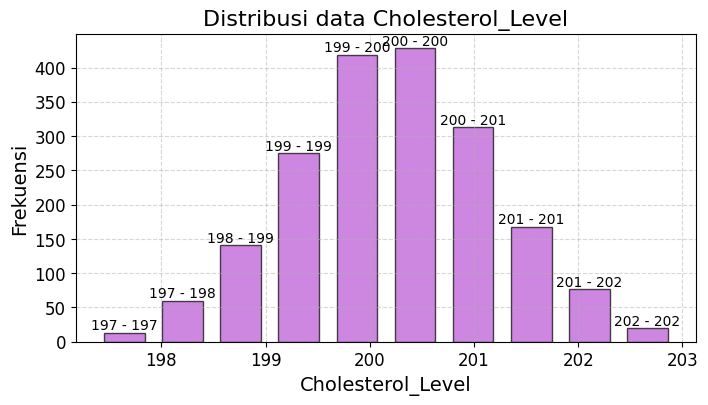

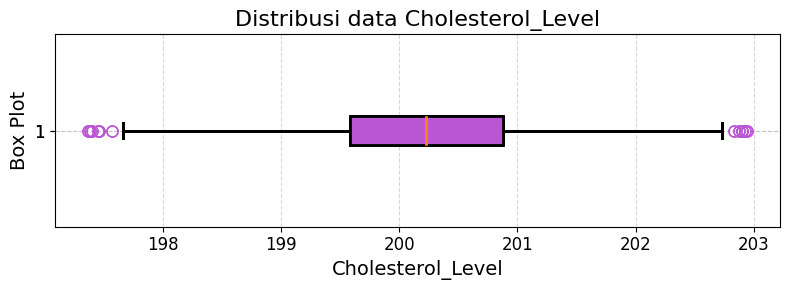

In [14]:
distribution_plot_numeric(data_column_numeric[4], True, bin_count=10)

#### Data Weight

Kolom Weight merupakan data berat badan yang berupa bilangan real yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Weight memiliki range 59,059 dengan nilai minimum 41,274 dan nilai maksismum 100,333.

Hasil histogram, menunjukan distribusi Weight yang simetris dengan frekuensi tertingi berada pada range 67-70 dan terkecil pada range 97-100.

Hasil box plot, menunjukan adanya positif skewness (-0,048). Hal ini disebabkan posisi nilai median(70,317) yang lebih dekat dengan nilai Kuartil 1(63,634) dibandingkan dengan nilai Kuartil 3(76,787). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

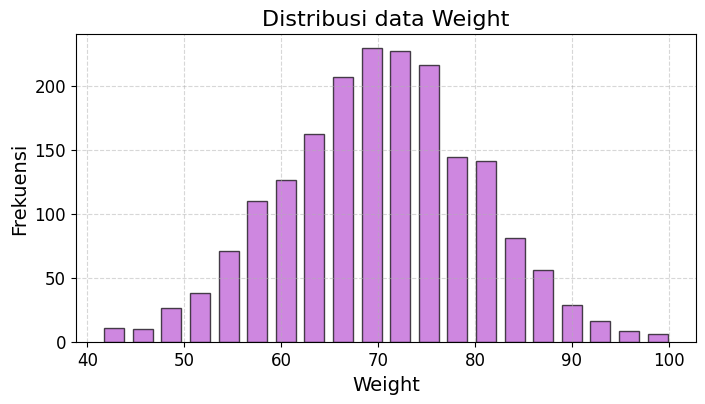

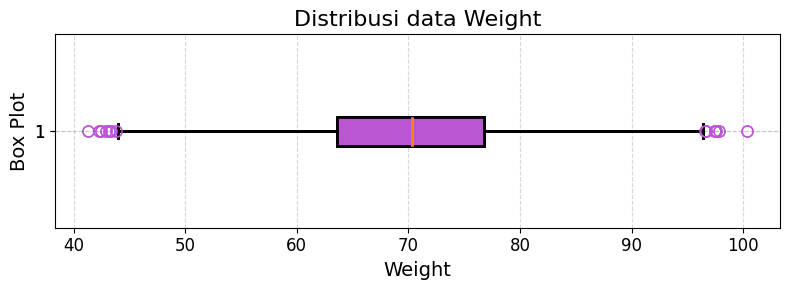

In [22]:
distribution_plot_numeric(data_column_numeric[5])

#### Data Height

Kolom Height merupakan data tinggi badan yang berupa bilangan real yang dibagi menjadi 16 bagian dengan lebar yang sama. Kolom Height memiliki range 3,646 dengan nilai minimum 149.125 dan nilai maksismum 152,771.

Hasil histogram, menunjukan distribusi Height yang mengalami skewness positif dengan frekuensi tertingi berada pada range 149-149(Desimal tidak terlihat) dan terkecil pada range 152-152(Desimal tidak terlihat).

Hasil box plot, menunjukan adanya positif skewness (0,448). Hal ini disebabkan posisi nilai median(150,657) yang lebih dekat dengan nilai Kuartil 3(151,130) dibandingkan dengan nilai Kuartil 1(150,238). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

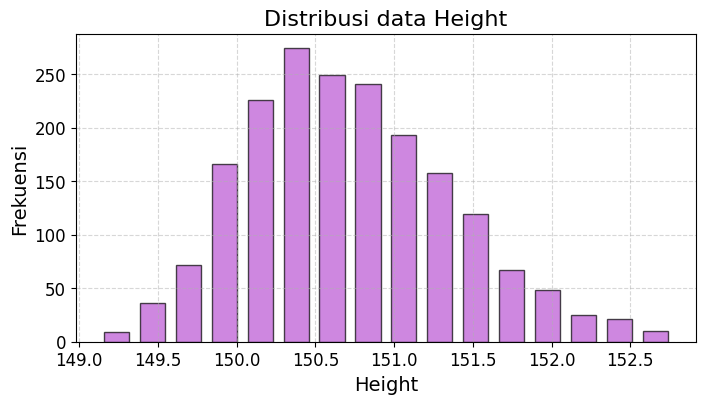

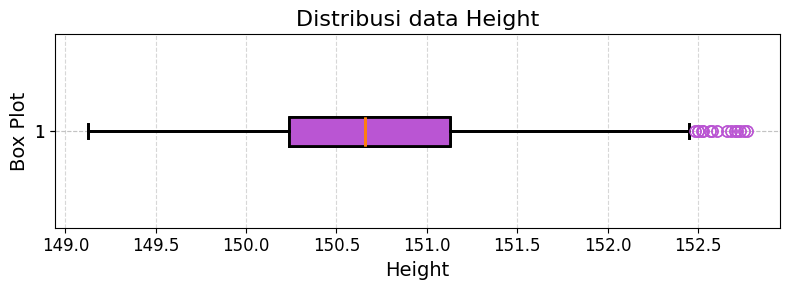

In [16]:
distribution_plot_numeric(data_column_numeric[6], bin_count=16)

#### Data Blood_Pressure

Kolom Blood_Pressure merupakan data ukuran tekanan darah yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Blood_Pressure memiliki range 3,646 dengan nilai minimum 88,579 dan nilai maksismum 150,635.

Hasil histogram, menunjukan distribusi Blood_Pressure yang mengalami skewness positif dengan frekuensi tertingi berada pada range 119-122 dan terkecil pada range 88-91.

Hasil box plot, menunjukan adanya positif skewness (-0,050). Hal ini disebabkan posisi nilai median(120,007) yang lebih dekat dengan nilai Kuartil 1(113,191) dibandingkan dengan nilai Kuartil 3(126,604). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

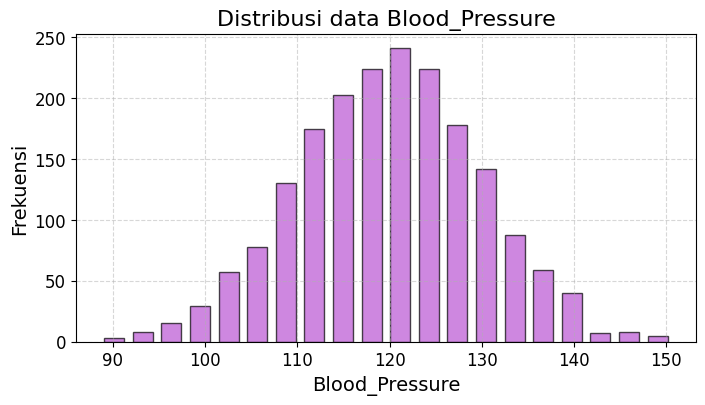

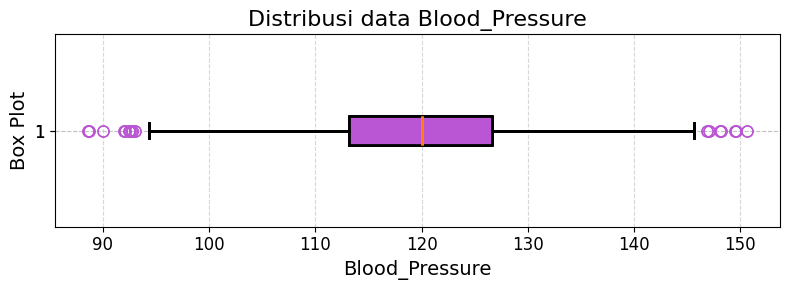

In [17]:
distribution_plot_numeric(data_column_numeric[7])

#### Data Gender

Kolom Gender merupakan data kelamin yang terbagi menjadi 2, yaitu Male dan Female

Distribusi data kolom Gender adalah rata(uniform). Hal tersebut dikarenakan proporsi Female bernilai 50,575% dan Male bernilai 49,425%. 

|  Unique Value  | Frekuensi | Proporsi (%) |
|:--------------:|:---------:|:------------:|
|     Female     |    968    |  50.574713   |
|      Male      |    946    |  49.425287   |

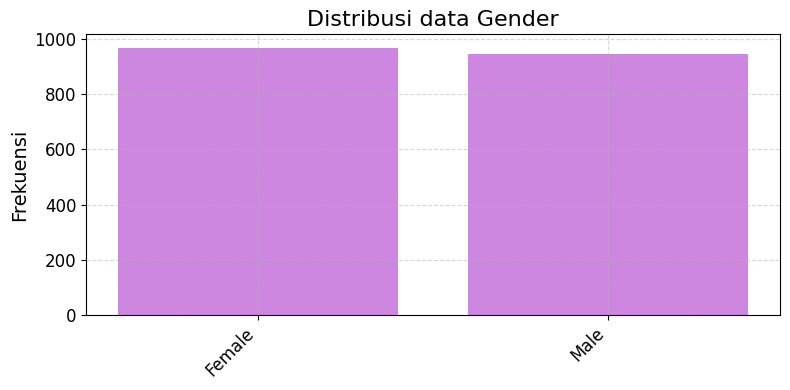

In [21]:
distribution_plot_string(data_column_string[0])

#### Data Education

Kolom Education merupakan data tingkat edukasi yang terbagi menjadi 5, yaitu Banchelor's Degree, Master's Degree, High School, Phd dan Other

Distribusi data kolom Education adalah tidak rata dengan 46,76% adalah Banchelor's Degree

|   Unique Value    | Frekuensi | Proporsi (%) |
|:-----------------:|:---------:|:------------:|
| Bachelor's Degree |    895    |  46.760711   |
|  Master's Degree  |    469    |  24.503657   |
|    High School    |    258    |  13.479624   |
|        PhD        |    240    |  12.539185   |
|       Other       |    52     |   2.716823   |

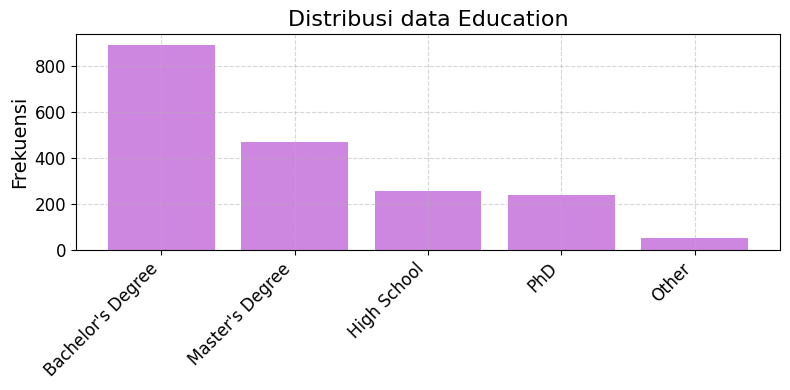

In [22]:
distribution_plot_string(data_column_string[1])

#### Data Health_Status

Kolom Health_Status merupakan data status kesehatan yang terbagi menjadi 4, yaitu Fair, Poor, Excellent, dan Good

Distribusi data kolom Health_Status adalah rata(uniform) dengan rata-rata proporsi setiap bagian adalah 25%

|   Unique Value   |  Frekuensi  | Proporsi (%) |
|:----------------:|:-----------:|:------------:|
|       Fair       |     498     |  26.018809   |
|       Poor       |     486     |  25.391850   |
|    Excellent     |     481     |  25.130617   |
|       Good       |     449     |  23.458725   |

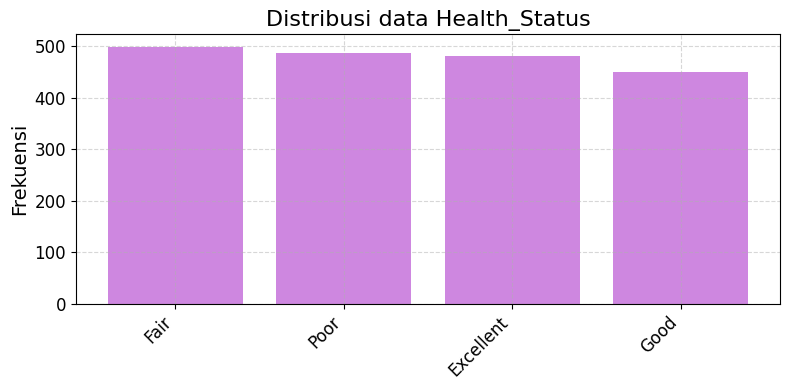

In [23]:
distribution_plot_string(data_column_string[2])

## Nomor 4

Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram.
Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

### Jawab

Data yang digunakan pada setiap kolom merupakan data diskrit, sehingga distribusi data menggunakan distribusi diskrit. Untuk menentukan jenis dari distribusi kami melakukan test-test berikut:
- D’Agostino’s K-squared Test -> distribusi normal
- Kolmogorov-Smirnov Test -> distribusi uniform
- Chi-Square Test -> distribusi poisson

Tidak semua test untuk semua jenis distribusi digunakan. Namun dengan menggunakan test-test tersebut, sudah cukup untuk menentukan semua distribusi dari data numerik.

In [23]:

def get_chi_square_p(column_values):
    """
    Calculates the p-value of the Chi-squared test for a given column's distribution.
    
    Parameters:
        column_values (Series): The pandas Series containing the data.
        
    Returns:
        float: The p-value of the Chi-squared test.
    """
    # Fit a Poisson distribution to the data
    mu = column_values.mean()
    expected_counts = np.array([stats.poisson.pmf(i, mu) * len(column_values) for i in range(int(column_values.min()), int(column_values.max()) + 1)])

    # Calculate observed frequencies
    observed_counts, _ = np.histogram(column_values, bins=len(expected_counts), range=(int(column_values.min()), int(column_values.max()) + 1))
    # print(expected_counts)
    # print(observed_counts)

    # Perform the chi-squared test
    try:
        _, p_value = stats.chisquare(observed_counts, expected_counts)
        return p_value
    except:
        return 0
    # _, p_value = stats.chisquare(observed_counts, np.sum(observed_counts)/np.sum(expected_counts) * expected_counts)


def test_distribution(column_name: str) -> None:
    # Check if the data contain string or non-calculated data
    if result_data[column_name].dtype == 'object' :
        display(Markdown("#### Kolom %s Memiliki Tipe Data String" % column_name))
        display(Markdown("#### Sehingga tidak berdistribusi"))
        return

    column_values = result_data[column_name]
    
    # D’Agostino’s K-squared Test
    # Checks if the distribution is normal distribution
    stat_normal, p_normal = stats.normaltest(column_values)

    if p_normal >= 0.05:
        # Normal distribution
        
        # Display p value and conclusion
        display(Markdown("#### D’Agostino’s K-squared Test"))
        display(Markdown("#### nilai $p-normal$ = $%.20f$" % p_normal))
        display(Markdown("#### Kolom %s Berdistribusi Normal" % column_name))
        
    else:
        # Non-normal distribution

        # Kolmogorov-Smirnov Test
        # Checks if the distribution is uniform distribution
        stat_uniform, p_uniform = stats.kstest(column_values, 'uniform')
        
        if p_uniform > 0.05:
            # Distribution is similar to uniform distribution
            display(Markdown("#### Kolmogorov-Smirnov Test"))
            display(Markdown("#### nilai $p-uniform$ = $%.20f$" % p_uniform))
            display(Markdown("#### Kolom %s Mirip Dengan Distribusi Uniform" % column_name))
            
        else:
            # Non-normal distribution
            # Non-uniform distribution
            
            # Chi-Squared Test 
            # Checks if the distribution is poisson distribution     
            if get_chi_square_p(column_values) >= 0.5:
                display(Markdown("#### Kolom %s Mirip Dengan Distribusi Uniform" % column_name))
            else:
                # Poisson Distribution Test
                display(Markdown(f"#### Test gagal untuk menemukan tipe distribusi {column_name}"))

    plt.figure(figsize=(8, 4))
    column_values.plot(kind="hist", color="mediumorchid", linewidth=1.9, edgecolor="#550d52", bins=40, density="True", rwidth=0.7)
    column_values.plot(kind="kde", color="#22ff22", linewidth=3, figsize=(10, 6))
    plt.title(column_name)
    plt.show()


#### Test gagal untuk menemukan tipe distribusi Age

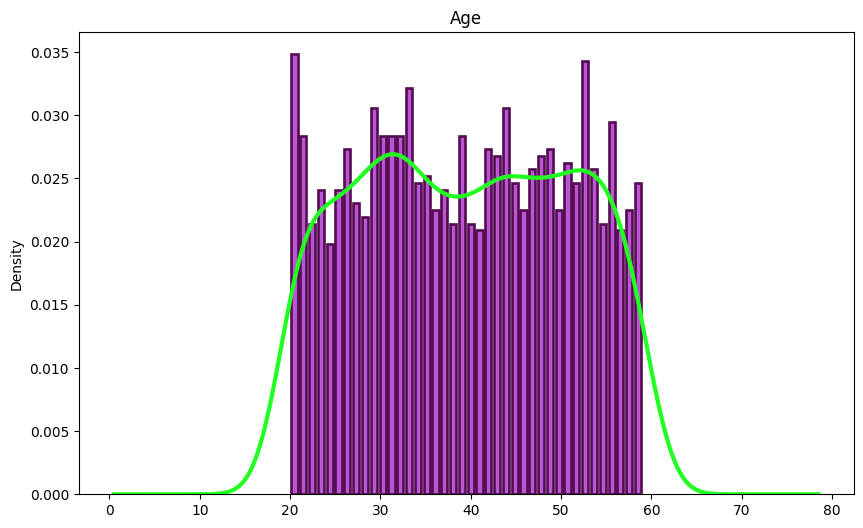

In [25]:
# print(data_column_numeric[0])
test_distribution(data_column_numeric[0])

#### D’Agostino’s K-squared Test

#### nilai $p-normal$ = $0.45950224739589373701$

#### Kolom Income Berdistribusi Normal

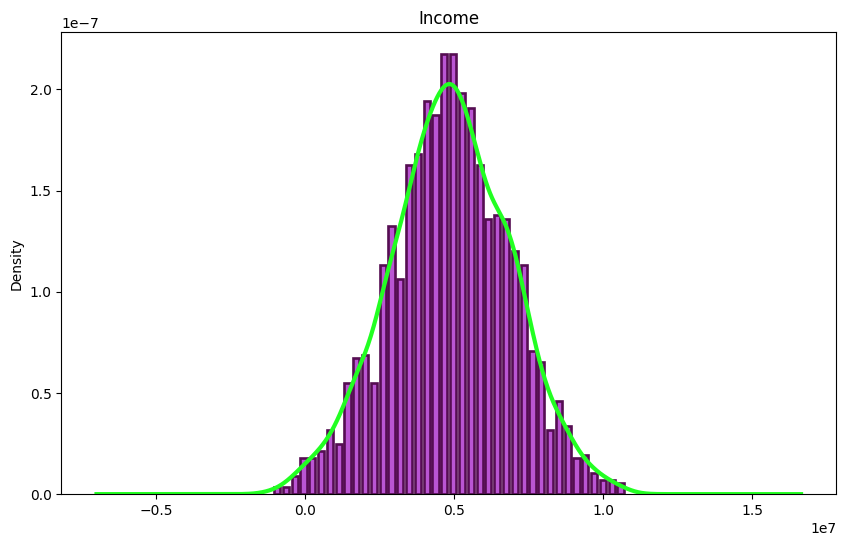

In [26]:
test_distribution(data_column_numeric[1])

#### D’Agostino’s K-squared Test

#### nilai $p-normal$ = $0.06979647260463475722$

#### Kolom Stress_Level Berdistribusi Normal

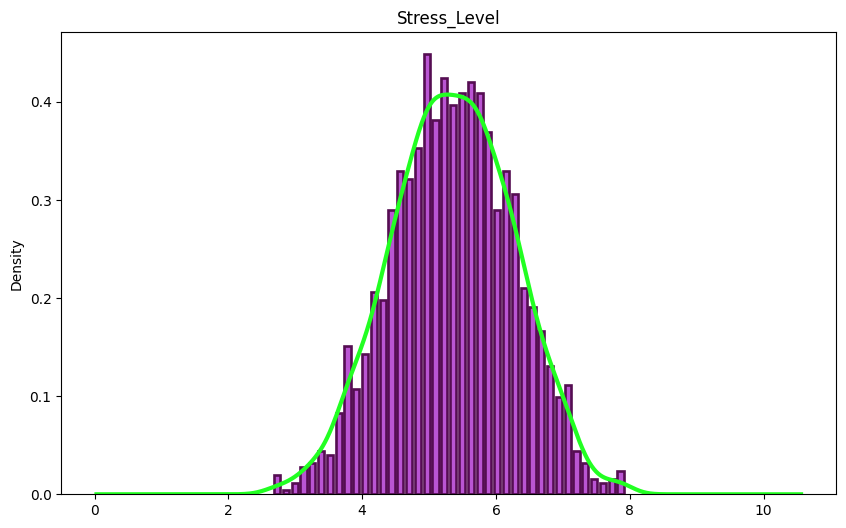

In [27]:
test_distribution(data_column_numeric[2])

#### Test gagal untuk menemukan tipe distribusi Exercise_Hours_Per_Week

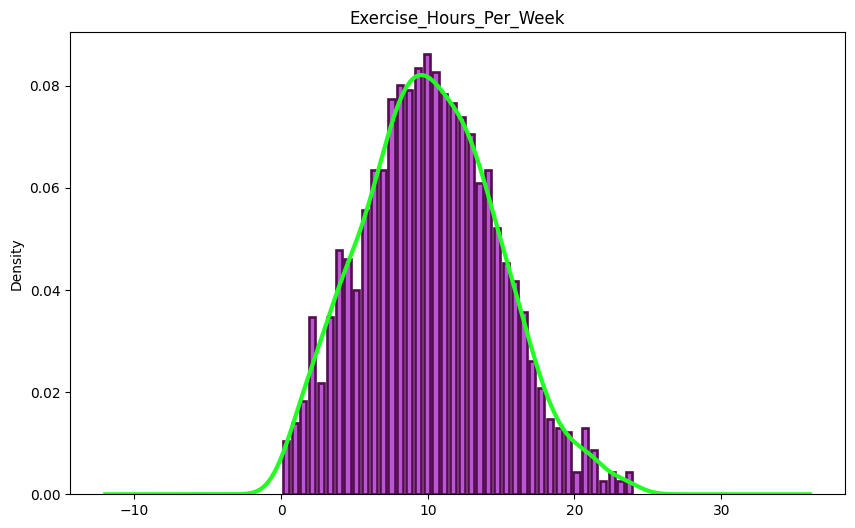

In [28]:
test_distribution(data_column_numeric[3])

#### D’Agostino’s K-squared Test

#### nilai $p-normal$ = $0.41217291702274494458$

#### Kolom Cholesterol_Level Berdistribusi Normal

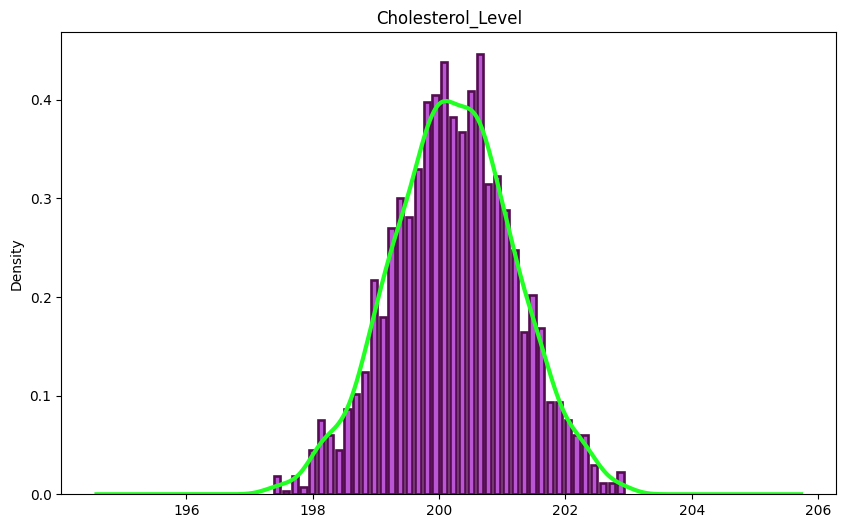

In [29]:
test_distribution(data_column_numeric[4])

#### D’Agostino’s K-squared Test

#### nilai $p-normal$ = $0.32425346702837748447$

#### Kolom Weight Berdistribusi Normal

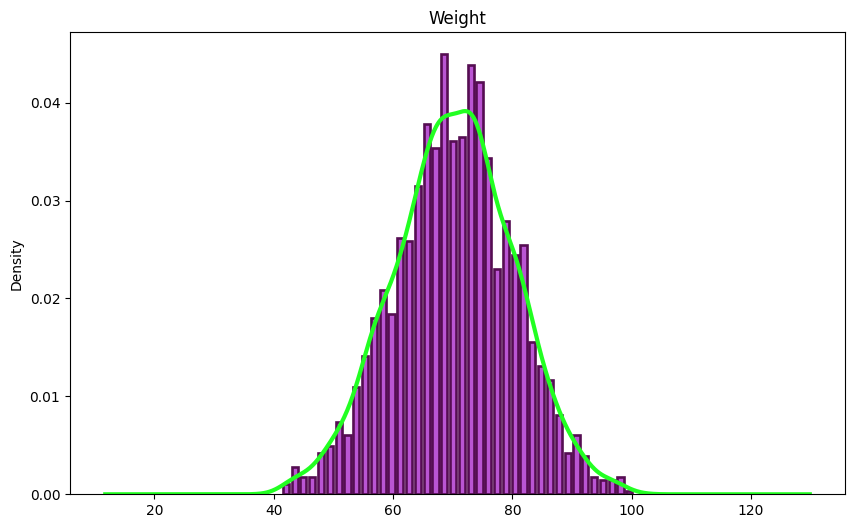

In [24]:
test_distribution(data_column_numeric[5])

#### Test gagal untuk menemukan tipe distribusi Height

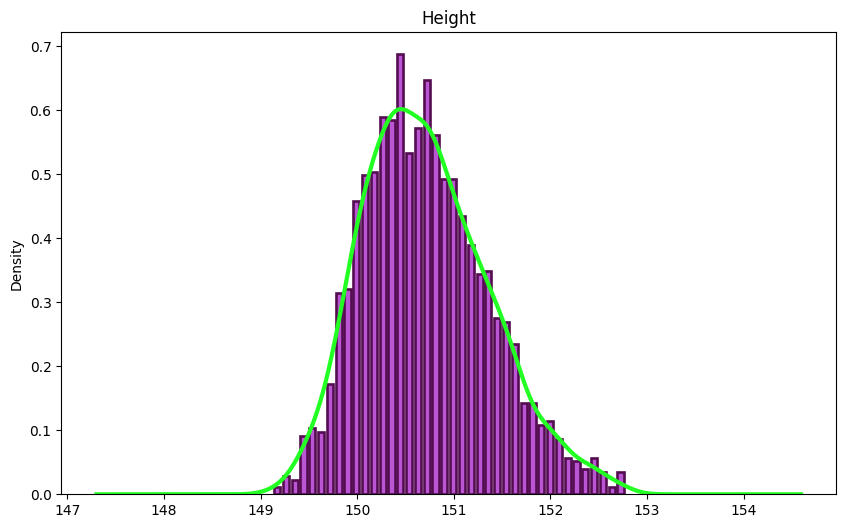

In [31]:
test_distribution(data_column_numeric[6])

#### D’Agostino’s K-squared Test

#### nilai $p-normal$ = $0.52823038595008076079$

#### Kolom Blood_Pressure Berdistribusi Normal

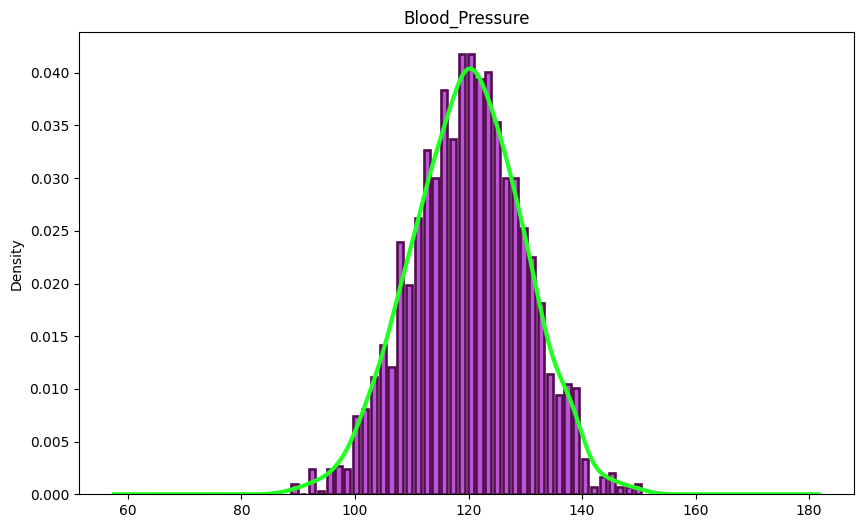

In [32]:
test_distribution(data_column_numeric[7])

In [33]:
test_distribution(data_column_string[0])

#### Kolom Gender Memiliki Tipe Data String

#### Sehingga tidak berdistribusi

In [34]:
test_distribution(data_column_string[1])

#### Kolom Education Memiliki Tipe Data String

#### Sehingga tidak berdistribusi

In [35]:
test_distribution(data_column_string[2])

#### Kolom Health_Status Memiliki Tipe Data String

#### Sehingga tidak berdistribusi

# Soal khusus dataset

Mira adalah seorang peneliti kesehatan yang bekerja di sebuah lembaga riset medis
yang terkemuka. Sebagai bagian dari tugasnya, Mira memiliki akses ke sebuah dataset yang
berisi informasi tentang profil kesehatan dan gaya hidup dari sejumlah individu. Mira
bertanggung jawab untuk melakukan analisis statistika terhadap dataset ini guna mendapatkan
pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kesehatan dan kualitas
hidup individu. Selain itu, Mira juga diminta untuk mengidentifikasi pola dan hubungan yang
signifikan antara variabel-variabel tersebut, serta untuk menjawab berbagai pertanyaan
penelitian yang diajukan oleh lembaga riset.


Atribut: Age, Income, Gender, Education, Stress_Level, Exercise_Hours_Per_Week,
Cholesterol_Level, Weight,Height, Blood_Pressure, Health_Status


Gunakan alpha = 0.05

### Langkah Hipotesis
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain
berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang
digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes
signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang
diinginkan

## Nomor 5: Hipotesis 1 sampel

- Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang
disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan
pasien diatas 65 kg?
- Tekanan darah sistole yang normal berada pada rentang 120 mmHg. Lembaga riset
perlu untuk memastikan apakah data individu yang diukur cukup normal. Periksalah
apakah rata-rata tekanan darah sistole bernilai 120 mmHg?
- Periksalah apakah data 200 individu pertama pengujian (baris teratas) memiliki rata-rata
waktu olahraga per minggu tidak sama dengan 15 jam?
- Apakah penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak
sama dengan 30% dari data keseluruhan individu?

In [12]:
# Definisi uji dengan z test
# z-test digunakan saat tabel berdistribusi normal dan diketahui standar deviasi dari populasi
def calculateZ(xbar: float, mu: float, n: int, deviation: float) -> float:
    """
    Menghitung nilai-z dari data
    Parameters
    ----------
        xbar: mean of sample with size n
        mu: real mean of population
        n: size of the sample
        deviation: population standard deviation
    Return:
        z-value of data with sample size n and xbar
    """    
    return (xbar - mu) / (deviation / math.sqrt(n))

def pValue(zValue: float) -> float:
    return stats.norm.cdf(zValue)

### 5.1. Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan pasien diatas 65 kg?

Berdasarkan persoalan di atas, dapat digunakan metode uji hipotesis dengan 1 sampel tes. Didefinisikan bahwa H0 adalah rata-rata berat badan pasien = 65 kg, dan H1 adalah rata-rata berat badan pasien di atas 65 kg.

In [19]:
weight_data = result_data[data_column_numeric[5]]

# 1. Definisi hipotesis 0 H0 saat rata-rata = 65, menjadi nilai Mu0
mu = 65

# 2. Definisi hipotesis alternatif H1 saat rata-rata > 65
print(f"H0: mu = {mu} \nH1: mu > {mu}")

# 3. Tingkat signifikan α yang digunakan adalah 0.05.
alpha = 0.05
print("Digunakan tingkat signifikan α =", alpha)

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
# Tes uji statistik yang digunakan adalah menggunakan z-test
Z_critical = stats.norm.ppf(1 - 0.05)
print(np.mean(weight_data), mu, len(weight_data), np.std(weight_data))
z_value = calculateZ(np.mean(weight_data), mu, len(weight_data), np.std(weight_data))

print("Didapatkan nilai z =", z_value)

# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
# Jika berdasarkan uji tes nilai peluang masuk ke daerah kritis, maka tolak H0, jika tidak terima H0
# 


"""
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes
signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang
diinginkan
"""
if pValue(z_value) > pValue(alpha):
    print(f"Hipotesis 0 ditolak, dengan nilai z = {z_value} dan kritis z: {0.05}. Nilai H1")
else:
    print("acc")

H0: mu = 65 
H1: mu > 65
Digunakan tingkat signifikan α = 0.05
70.19587618536667 65 1914 9.97024304926592
Didapatkan nilai z = 22.79943132941969
Hipotesis 0 ditolak, dengan nilai z = 22.79943132941969 dan kritis z: 0.05. Nilai H1


## Nomor 6: Hipotesis 2 sampel

Lembaga riset membagi data individu menjadi dua bagian, yaitu data individu yang lebih
awal masuk data penelitian (bagian atas) dan yang baru saja (bagian bawah).

- Periksa apakah rata-rata berat badan individu yang lebih awal masuk data penelitian
sama dengan rata-rata berat badan individu yang masuk baru saja?
- Bagaimana dengan pendapatan individu, apakah pendapatan sistole individu yang lebih
awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru saja masuk?
- Lembaga riset ingin membandingkan kondisi kesehatan individu dari dua bagian data.
Apakah variansi tekanan darah individu yang lebih awal masuk data penelitian sama
dengan yang baru saja masuk?
- Apakah proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu
awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu
olahraga yang sama?